# S1. Bayesian coin flip

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

np.random.seed(2020)

## A: Define a prior distribution

The prior distribution encapsulates our beliefs (before observing data) 

In [2]:
prior_x = np.linspace(0,1,11)

alpha,beta = 2,2 # change these values and plot to get a different prior
prior_y = stats.beta(alpha,beta).pdf(prior_x)
prior_y = prior_y/prior_y.sum()

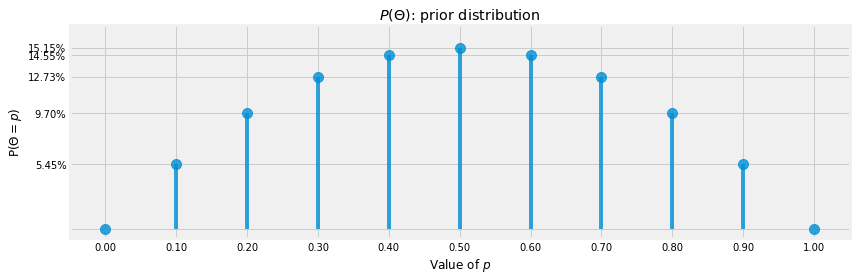

In [3]:
# plot the prior
fig = plt.figure(figsize=(12,4))
ax  = fig.add_subplot(1,1,1)

for x_,y_ in zip(prior_x, prior_y):
    _ = ax.plot([x_,x_],[0,y_],c='C0',alpha=0.8)
    _ = ax.plot(x_,y_,'o',ms=10,c='C0',alpha=0.8)
ax.set_title('$P(\Theta)$: prior distribution')

ax.set_xticks(prior_x)
ax.set_xticklabels(['{0:.2f}'.format(x_) for x_ in prior_x[:]])
ax.set_xlabel('Value of $p$')

ax.set_yticks(prior_y)
ax.set_yticklabels([None]+['{0:.2f}%'.format(y_*100) for y_ in prior_y[1:6]])

ax.set_ylim([None,0.17])
ax.set_ylabel('P($\Theta=p$)')
plt.tight_layout()

## B: Gather observations: Flip the coin

In [4]:
np.random.seed(1)

# the true value of p, not revealed to us
p_real = np.random.uniform(0.15,0.85,1)

# number of observations to make
n_flips = 15

# 1=heads, 0=tails
flips = (np.random.uniform(0,1,n_flips) < p_real)*1
flips

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

### Bar chart of observations so far

[Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0')]

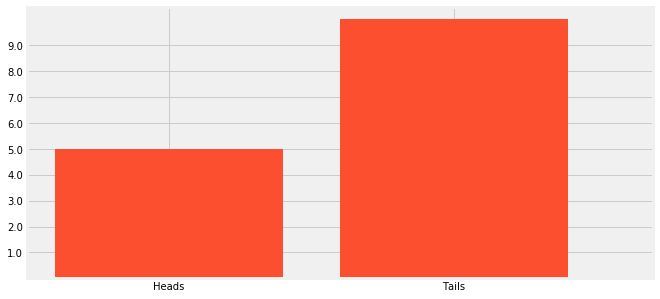

In [5]:
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(1,1,1)
d,_,_ = ax.hist(flips,bins=2,width=0.4,color='C1')
ax.set_xticks([0.2,0.7])
ax.set_xticklabels(['Heads','Tails'])
ax.set_yticks(np.arange(1,np.max(d)))
ax.set_yticklabels(np.arange(1,np.max(d)))

## C:  Define likelihood function

In [6]:
likelihood = lambda data,p:  p**(data.sum()) * (1-p)**(len(data)-data.sum())

#### Plot likelihood after 2 flips

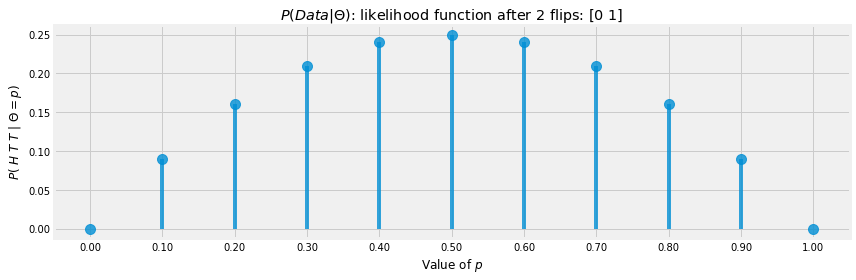

In [7]:
fig = plt.figure(figsize=(12,4))
ax  = fig.add_subplot(1,1,1)
nl = 2

l = [likelihood(flips[:nl],p_) for p_ in prior_x]
for x_,y_ in zip(prior_x, l):
    _ = ax.plot([x_,x_],[0,y_],c='C0',alpha=0.8)
    _ = ax.plot(x_,y_,'o',ms=10,c='C0',alpha=0.8)
ax.set_title('$P(Data|\Theta)$: likelihood function after {} flips: {}'.format(nl,str(flips[:nl])))

ax.set_xticks(prior_x)
ax.set_xticklabels(['{0:.2f}'.format(x_) for x_ in prior_x[:]])
# ax.set_xlabel('Value of $p$')

# ax.set_yticks(prior_y)
# ax.set_yticklabels([None]+['{0:.2f}%'.format(y_*100) for y_ in prior_y[1:6]])

ax.set_ylabel('$P($ $H$ $T$ $T$ $|$ $\Theta=p)$')
ax.set_xlabel('Value of $p$')
plt.tight_layout()

# D: Plot the posterior after each flip

in the bayesian framework we combine the prior and likelihood to get the posterior

demonstrates how posterior beliefs change over time

do we become more or less certain?

In [8]:
translate = lambda x: 'H' if x else 'T'

<Figure size 432x288 with 0 Axes>

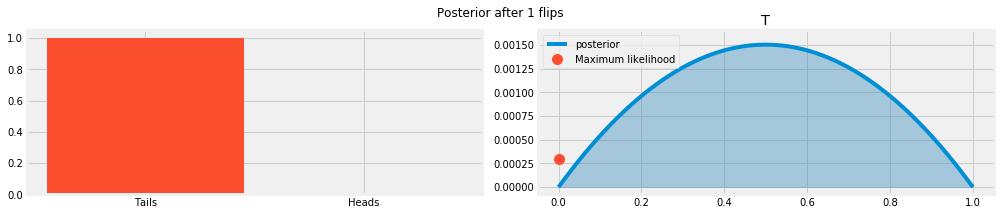

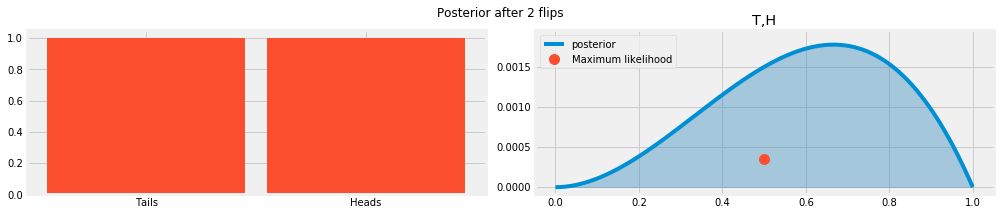

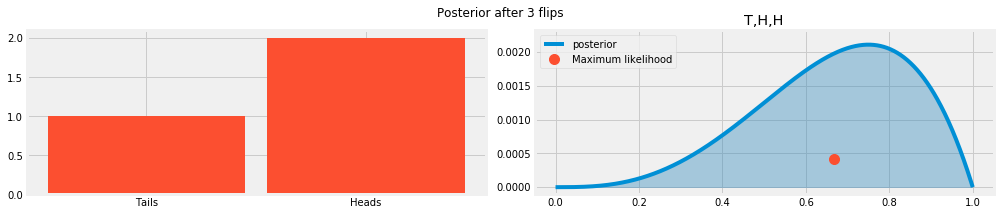

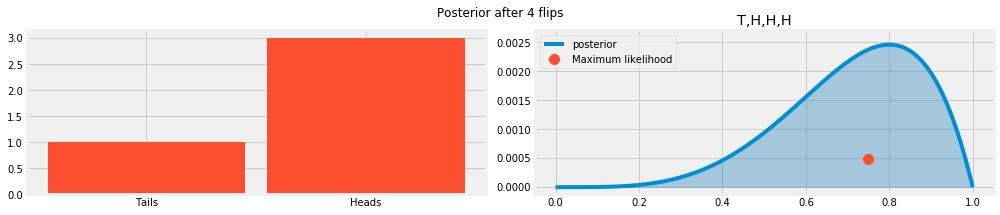

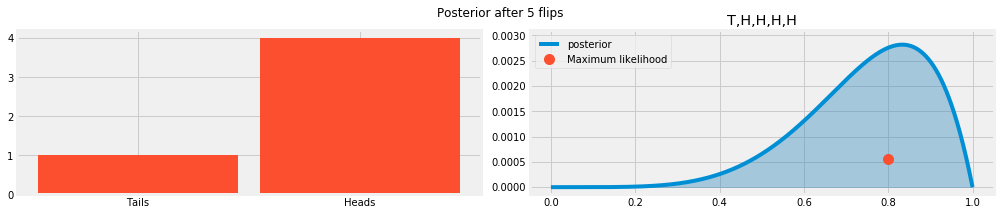

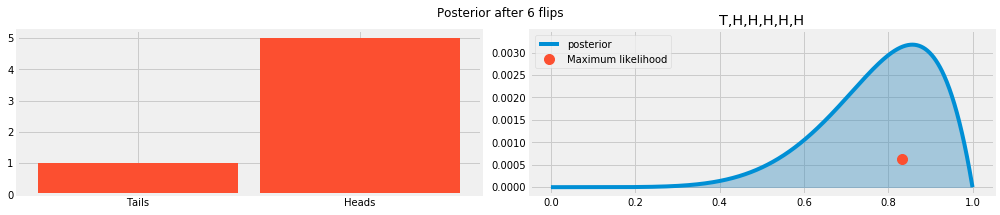

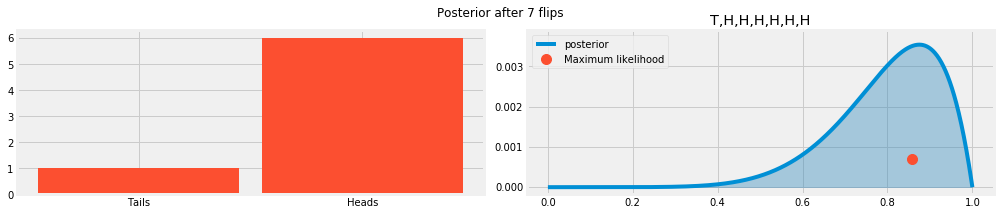

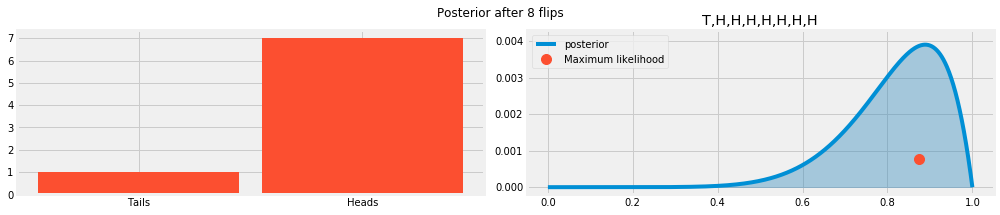

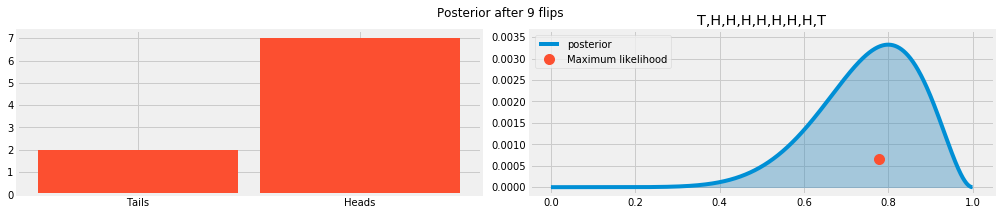

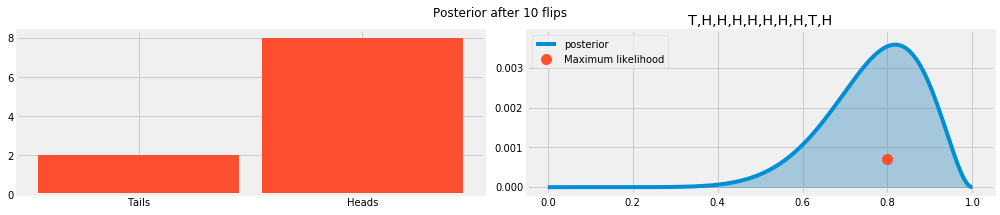

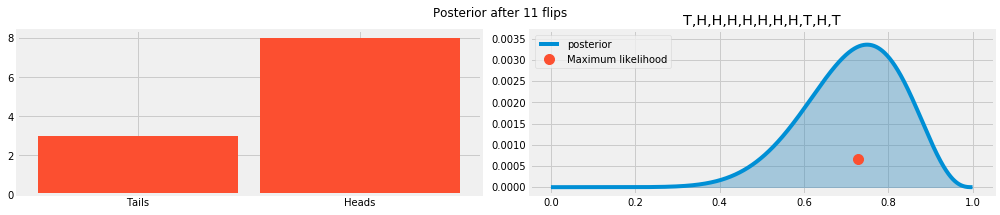

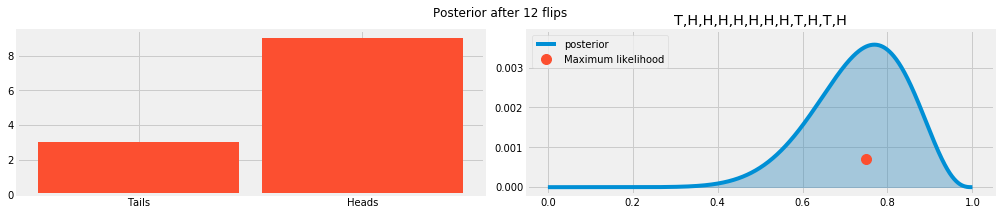

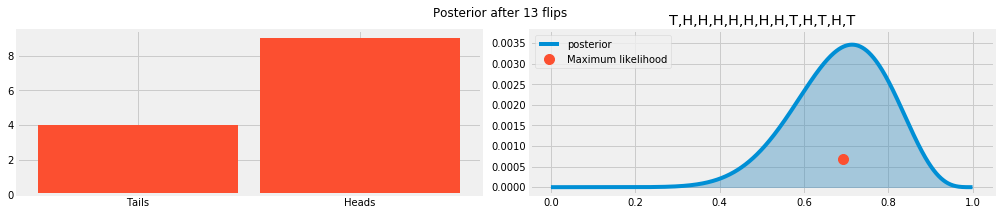

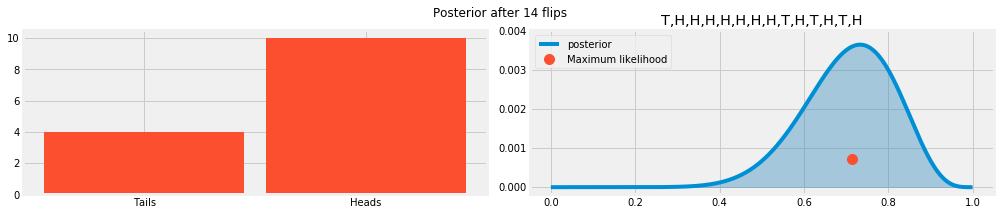

In [9]:
# 1=heads, 0=tails
likelihood = lambda theta,results:  theta**len(np.where(results==1)[0]) * (1-theta)**len(np.where(results==0)[0])
x = np.linspace(0,1,1000)

cols = 2

for f,flip in enumerate(flips):
    if f>0:
        fig = plt.figure(figsize=(14,3))

        ax  = fig.add_subplot(1,2,1)
        _   = ax.bar(['tails','heads'],height=[np.where(flips[:f]==0)[0].shape[0],
                                               np.where(flips[:f]==1)[0].shape[0]],
                     color='C1',width=0.9)
        ax.set_xticks([0,1])
        ax.set_xticklabels(['Tails','Heads'])

        ax  = fig.add_subplot(1,2,2)
        evidence = np.sum([(likelihood(theta,flips[:f]) * theta) for theta in x])
        posterior = lambda theta: (likelihood(theta,flips[:f]) * theta)/evidence
        post = [posterior(theta) for theta in x]
        ax.plot(x,post,label='posterior')
        plt.fill_between(x, 0, [posterior(theta) for theta in x], color="#348ABD", alpha=0.4)

        ax.plot(flips[:f].sum()/f,np.max(post)*0.2,'o',ms=10,label='Maximum likelihood')

        ax.set_ylim([None,np.max(post)*1.1])
        ax.legend(loc='upper left')
        flip_str = ','.join(list(map(translate,flips[:f])))
        ax.set_title(flip_str)
        fig.suptitle('Posterior after {} flips'.format(f))

    plt.tight_layout()


## E: How does the posterior compare with the real value of p?

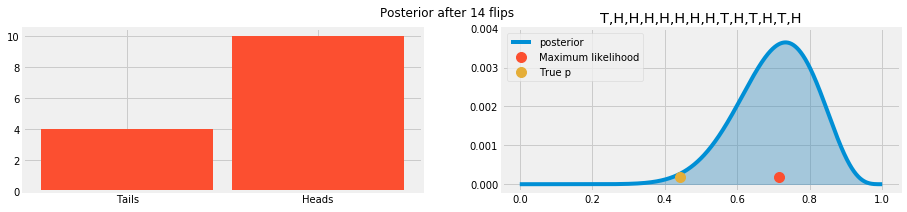

In [10]:
fig = plt.figure(figsize=(14,3))

ax  = fig.add_subplot(1,2,1)
_   = ax.bar(['tails','heads'],height=[np.where(flips[:f]==0)[0].shape[0],
                                       np.where(flips[:f]==1)[0].shape[0]],
             color='C1',width=0.9)
ax.set_xticks([0,1])
ax.set_xticklabels(['Tails','Heads'])
ax  = fig.add_subplot(1,2,2)
evidence = np.sum([(likelihood(theta,flips[:f]) * theta) for theta in x])
posterior = lambda theta: (likelihood(theta,flips[:f]) * theta)/evidence
post = [posterior(theta) for theta in x]
ax.plot(x,post,label='posterior')
plt.fill_between(x, 0, [posterior(theta) for theta in x], color="#348ABD", alpha=0.4)

ax.plot(flips[:f].sum()/f,np.max(post)*0.05,'o',ms=10,label='Maximum likelihood')
ax.plot(p_real,np.max(post)*0.05,'o',ms=10,label='True p')
ax.set_ylim([None,np.max(post)*1.1])
ax.legend(loc='upper left')
_ = fig.suptitle('Posterior after {} flips'.format(f))
flip_str = ','.join(list(map(translate,flips[:f])))
_ = ax.set_title(flip_str)


## F:  Try with even more flips

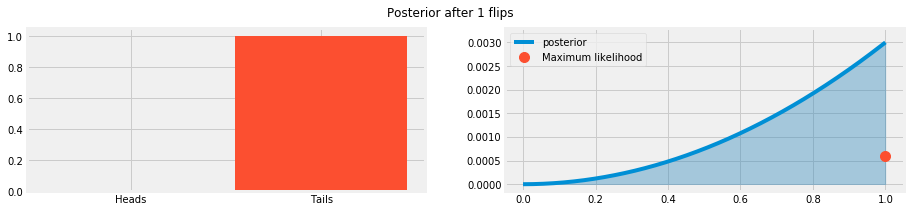

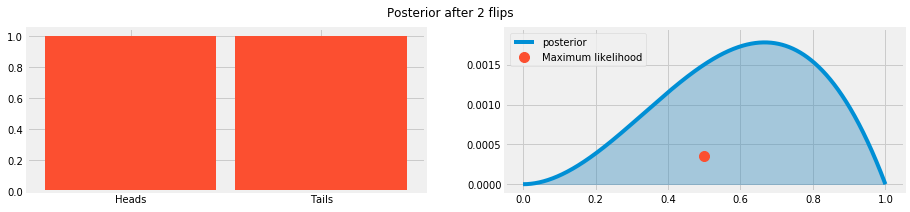

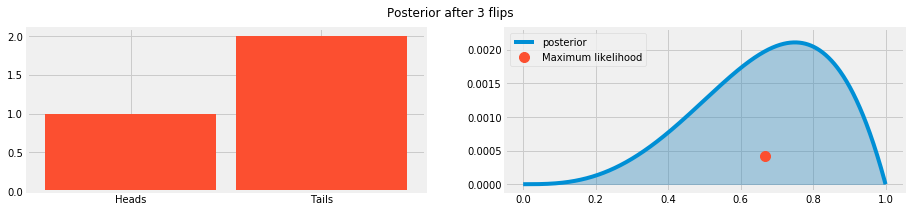

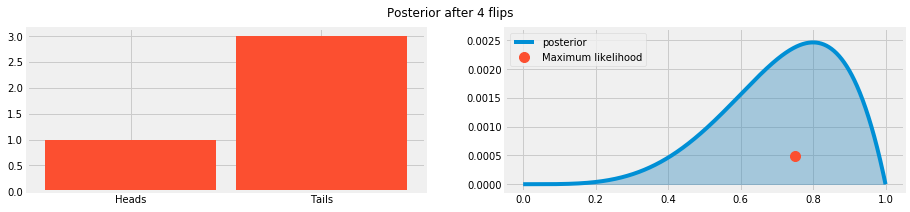

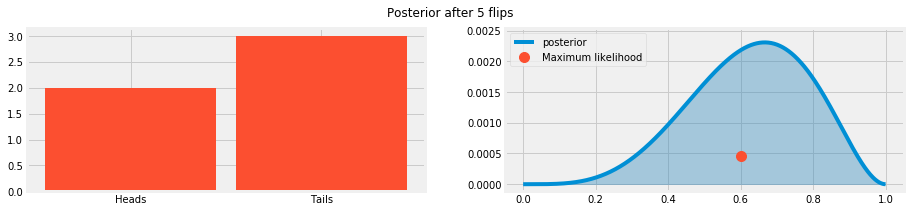

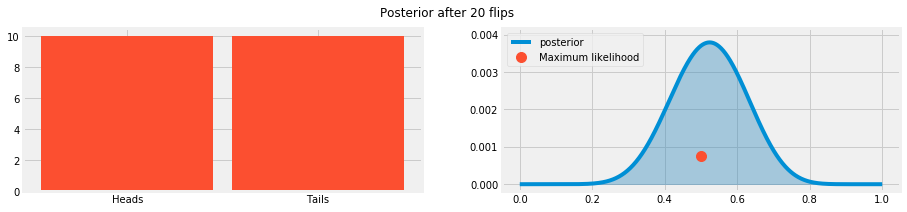

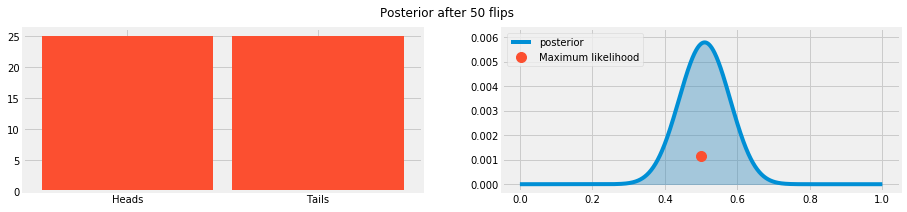

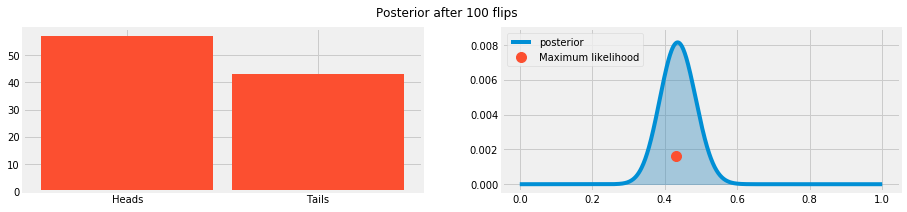

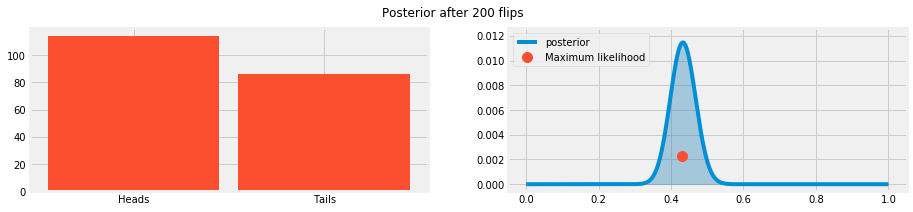

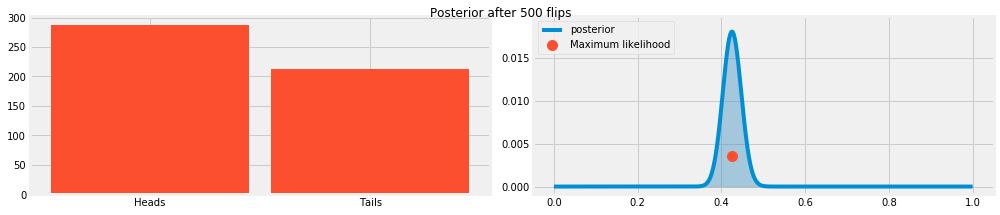

In [11]:
# 1=heads, 0=tails
likelihood = lambda theta,results:  theta**len(np.where(results==1)[0]) * (1-theta)**len(np.where(results==0)[0])
x = np.linspace(0,1,1000)

n_flips = 500
cols = 2

flips_2 = (np.random.uniform(0,1,n_flips) < p_real)*1

for f,flip in enumerate([1, 2, 3, 4, 5,20,50,100,200,n_flips]):
    fig = plt.figure(figsize=(14,3))
    
    ax  = fig.add_subplot(1,2,1)
    _   = ax.bar(['heads','tails'],height=[np.where(flips_2[:flip]==0)[0].shape[0],
                                           np.where(flips_2[:flip]==1)[0].shape[0]],
                 color='C1',width=0.9)
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Heads','Tails'])
#     ax.set_yticks(np.arange(1,np.max(d)))
#     ax.set_yticklabels(np.arange(1,np.max(d)))

    ax  = fig.add_subplot(1,2,2)
    evidence = np.sum([(likelihood(theta,flips_2[:flip]) * theta) for theta in x])
    posterior = lambda theta: (likelihood(theta,flips_2[:flip]) * theta)/evidence
    post = [posterior(theta) for theta in x]
    ax.plot(x,post,label='posterior')
    plt.fill_between(x, 0, [posterior(theta) for theta in x], color="#348ABD", alpha=0.4)

    ax.plot(flips_2[:flip].sum()/flip,np.max(post)*0.2,'o',ms=10,label='Maximum likelihood')
#     ax.plot(coin_bias,np.max(post)*0.1,'o',ms=10,c='k')
#    L = likelihood(np.linspace(0,1,100),flips[:flip])
#    ax.plot(x,L/L.sum(),label='likelihood')
    ax.set_ylim([None,np.max(post)*1.1])
    ax.legend(loc='upper left')
    fig.suptitle('Posterior after {} flips'.format(flip))
plt.tight_layout()


## G: How does the posterior compare to the true value of $p$ now?

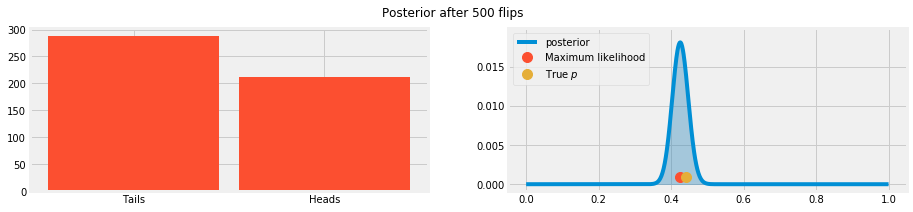

In [12]:
fig = plt.figure(figsize=(14,3))

ax  = fig.add_subplot(1,2,1)
_   = ax.bar(['tails','heads'],height=[np.where(flips_2==0)[0].shape[0],
                                       np.where(flips_2==1)[0].shape[0]],
             color='C1',width=0.9)
ax.set_xticks([0,1])
ax.set_xticklabels(['Tails','Heads'])
ax  = fig.add_subplot(1,2,2)

evidence = np.sum([(likelihood(theta,flips_2) * theta) for theta in x])
posterior = lambda theta: (likelihood(theta,flips_2) * theta)/evidence
post = [posterior(theta) for theta in x]

ax.plot(x,post,label='posterior')
plt.fill_between(x, 0, [posterior(theta) for theta in x], color="#348ABD", alpha=0.4)

ax.plot(flips_2.sum()/len(flips_2),np.max(post)*0.05,'o',ms=10,label='Maximum likelihood')
ax.plot(p_real,np.max(post)*0.05,'o',ms=10,label='True $p$')
ax.set_ylim([None,np.max(post)*1.1])
ax.legend(loc='upper left')
_ = fig.suptitle('Posterior after {} flips'.format(len(flips_2)))
flip_str = ','.join(list(map(translate,flips_2)))

